# Multi-Dimensional Linear Regression 
# Re-Analysis

The [dataset](https://github.com/ageron/handson-ml/tree/master/datasets/housing) used for this excercise in Multi-Dimensional Linear Regression is a modified version of the California Housing dataset available from [Luís Torgo's page](http://www.dcc.fc.up.pt/%7Eltorgo/Regression/cal_housing.html) (University of Porto). Luís Torgo obtained it from the StatLib repository (which is closed now). The dataset may also be downloaded from StatLib mirrors.

This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

## Theoretical background 

- [Generalized Linear Models](http://scikit-learn.org/stable/modules/linear_model.html)
- [Linear Regression Example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html) 
- [immoverkauf24: „Lage, Lage, Lage – alte Immobilienweisheit“](https://www.immoverkauf24.de/immobilienverkauf/immobilienverkauf-a-z/lage-lage-lage/)
--- 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy, scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import itertools
from math import sqrt

import seaborn as sns
sns.set()

## Import data subsets 

In [2]:
data_train = pd.read_csv("data/data_train.csv", na_values='') 
data_test = pd.read_csv("data/data_test.csv", na_values='') 

In [3]:
data_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND,top_house_value,top_housing_age
0,0.259400,0.205131,-0.551459,-0.075067,-0.035469,-0.165552,0.011666,-1.102799,-1.358294,0.0,0.0,1.0,0.0,0.0,0,0
1,0.838392,-0.923199,0.442325,0.045947,0.028931,-0.129347,0.090135,0.879856,0.635468,0.0,1.0,0.0,0.0,0.0,0,0
2,-0.519243,-0.234965,-1.003178,0.364526,0.436796,0.310414,0.526941,-0.600371,-0.021782,0.0,1.0,0.0,0.0,0.0,0,0
3,1.067992,-0.796789,0.351981,-0.624673,-0.658000,-0.652997,-0.642235,-0.725597,-0.870860,0.0,0.0,1.0,0.0,0.0,0,0
4,0.743557,-0.731243,0.442325,0.666145,1.042630,2.074754,1.191305,-0.305652,0.136503,0.0,1.0,0.0,0.0,0.0,0,0


--- 
## Brute-force: Multiple Linear Regression on *all combinations* of variables 

In [4]:
# create linear regression object 
lm = linear_model.LinearRegression()

In [5]:
""" --------------------------------------------------------------------
calc_r2_score fits a linear model to a training subset, 
makes a prediction for the test subset, 
and returns the R² score (quality of prediction index)
-------------------------------------------------------------------- """

def calc_r2_score(item): 
    # define variables 
    X_train = data_train.loc[:,features] 
    y_train = data_train.loc[:,target]
    X_test = data_test.loc[:,features] 
    y_test = data_test.loc[:,target]
    
    # fit linear model to training subset 
    model = lm.fit(X_train, y_train)
    
    # make a prediction using the test subset
    y_prediction = lm.predict(X_test)
    
    # return the R² score 
    return r2_score(y_test, y_prediction)

""" --------------------------------------------------------------------
calc_MSE follows up and returns the Mean Squared Error 
-------------------------------------------------------------------- """

def calc_RMSE(item):
    # define variables 
    X_train = data_train.loc[:,features] 
    y_train = data_train.loc[:,target]
    X_test = data_test.loc[:,features] 
    y_test = data_test.loc[:,target]
    
    # fit linear model to training subset 
    model = lm.fit(X_train, y_train)
    
    # make a prediction using the test subset
    y_prediction = lm.predict(X_test)
    
    # return the Root Mean Square Error (RMSE)
    return sqrt(mean_squared_error(y_test, y_prediction))


In [6]:
""" --------------------------------------------------------------------
define independent variables and target variable
-------------------------------------------------------------------- """

""" ------------------------ numerical only ----------------------------
features = ["longitude", "latitude", "housing_median_age", \
            "total_rooms", "total_bedrooms", "population", \
            "households", "median_income"]
-------------------------------------------------------------------- """

""" --------------------------- all in ---------------------------------
-------------------------------------------------------------------- """
features = ["longitude", "latitude", "housing_median_age", \
            "total_rooms", "total_bedrooms", "population", \
            "households", "median_income", "NEAR BAY", "<1H OCEAN", \
            "INLAND", "NEAR OCEAN", "ISLAND", "top_house_value", \
            "top_housing_age"]

target   = ["median_house_value"]

# opens an empty list for results of the upcoming for loop 
combinations = []

for i in range(2, len(features)+1):
    combinations += itertools.combinations(features, i)

In [7]:
len(combinations)

32752

In [8]:
""" --------------------------------------------------------------------
starts by defining empty lists to be filled by the for loop, 
then iterates over all elements of the list "combinations"
-------------------------------------------------------------------- """

features_included = []
results_r2_score = []
results_RMSE = []
no_of_features = []

for index, features in enumerate(combinations):
    features_included.append(features)
    results_r2_score.append(calc_r2_score(combinations[index]))
    results_RMSE.append(calc_RMSE(combinations[index]))
    no_of_features.append(len(combinations[index]))

In [9]:
# merge lists to a dataframe results_df 
# with the columns: 
# index, features, no_of_features, results_r2_score, results_RMSE 

results_df = pd.DataFrame(np.column_stack([features_included, no_of_features, results_r2_score, results_RMSE]),
                         columns=["features", "no_of_features", "results_r2_score", "results_RMSE"])

In [10]:
results_df.head()

,features,no_of_features,results_r2_score,results_RMSE
0,"(longitude, latitude)",2,0.244911,0.877256
1,"(longitude, housing_median_age)",2,0.00044882,1.00932
2,"(longitude, total_rooms)",2,0.0184441,1.0002
3,"(longitude, total_bedrooms)",2,0.00563994,1.0067
4,"(longitude, population)",2,7.00861e-05,1.00951


In [14]:
results_df.sort_values(["results_r2_score"],ascending=False).head(5)

,features,no_of_features,results_r2_score,results_RMSE
31156,"(longitude, latitude, housing_median_age, tota...",11,0.555608,0.672992
32191,"(longitude, latitude, housing_median_age, tota...",12,0.555597,0.673001
32354,"(longitude, latitude, housing_median_age, tota...",12,0.555566,0.673025
32644,"(longitude, latitude, housing_median_age, tota...",13,0.555551,0.673036
32349,"(longitude, latitude, housing_median_age, tota...",12,0.5555,0.673074


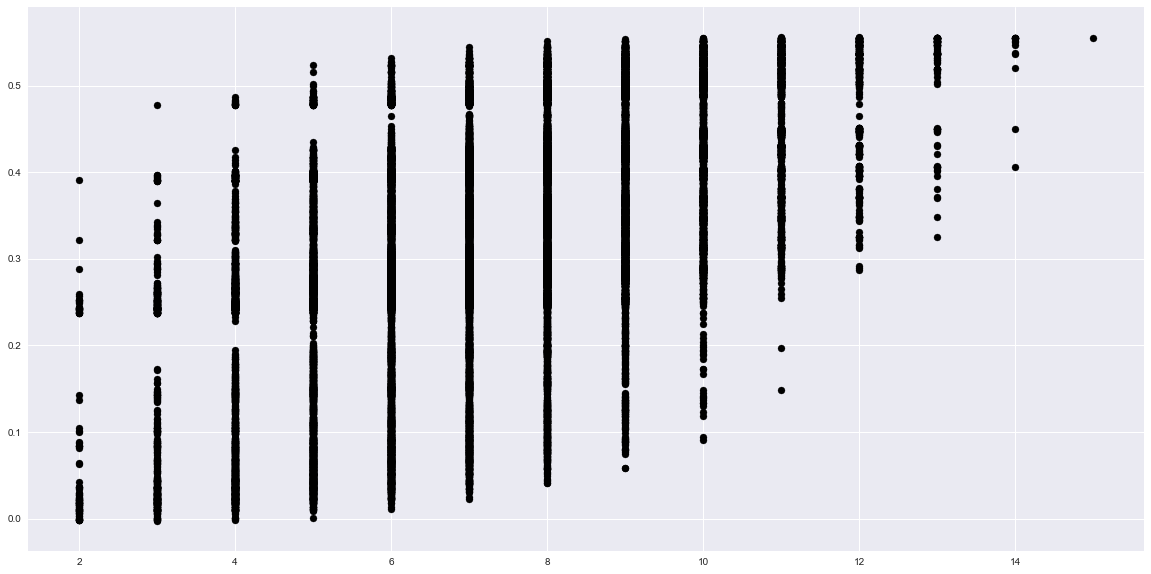

In [12]:
# Plot outputs
plt.figure(figsize=(20,10))
plt.scatter(results_df["no_of_features"], results_df["results_r2_score"], color='black')
plt.show();

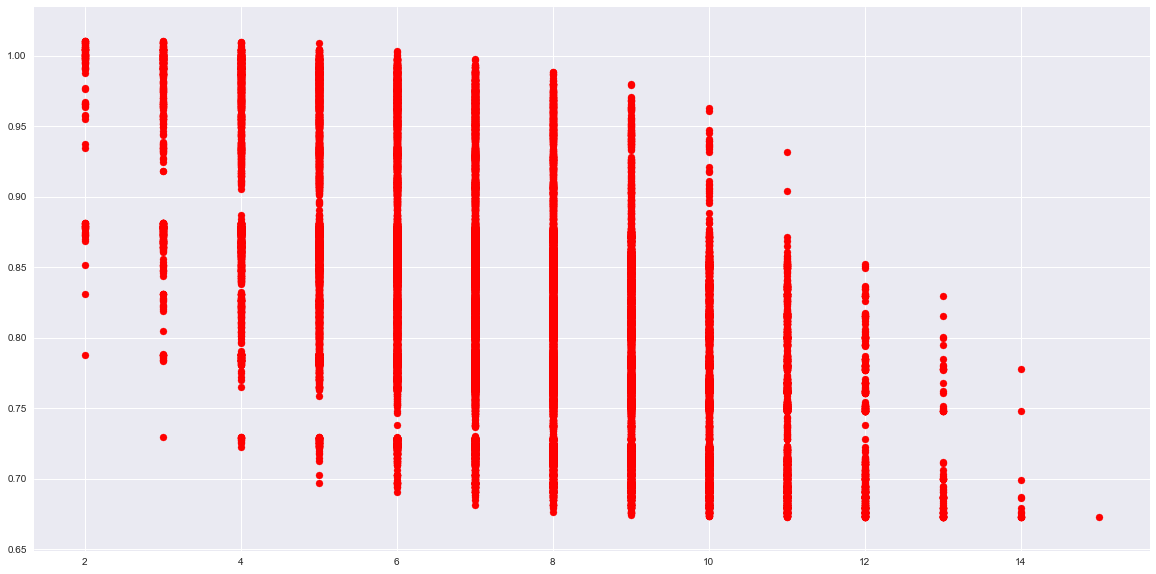

In [13]:
# Plot outputs
plt.figure(figsize=(20,10))
plt.scatter(results_df["no_of_features"], results_df["results_RMSE"], color='red')
plt.show();